# La condition des femmes et le développement économique 
Camille BALLU, Gaëlle DORMION et Julie NOWACK, 2A ENSAE Paris, Janvier 2022

# Introduction 

Selon l'OCDE, l'Organisme de Coopération et de Développement Economique, "Les économies sont plus résilientes, productives et inclusives lorsqu'elles réduisent les inégalités entre les sexes et soutiennent activement la participation égale des femmes dans toutes les sphères de la vie". L'idée selon laquelle les inégalités de genre freinent le développement tant sur un plan économique qu'humain semble mise en avant ici.

C'est ce qui nous a conduites à étudier le lien entre la situation économique et sociale des femmes et le niveau de développement du pays. Nous avons modélisé le niveau de développement des pays en nous appuyant sur le PIB (Produit Intérieur Brut) par tête.  

Pour mesurer ce lien, nous avons construit un indicateur multidimensionnel qui évalue l'impact de la condition des femmes sur le développement. En nous inspirant des travaux menés sur le GII (Gender Inequality Index), cet indicateur prend en compte de multiples facettes de la situation des femmes en lien avec leur activité et ressources économiques, leur santé, l'autonomie vis-à-vis de leurs corps, leur éducation, leur représentation au niveau politique, ou encore leur famille. Lorsque cela a été possible, nous avons choisi de comparer la situation des femmes à celle des hommes dans un même pays.

Pour mener ce travail, nous nous appuyons principalement sur les données de l'OCDE et de la Banque mondiale ainsi que des données scrappées. 

Avant de débuter, il est nécessaire d'avoir installé sur son environnement Python les packages sous les versions suivantes: 

- geopandas>=0.10
- numpy>=1.21
- pycountry>=20.7
- pandas>=1.3.4
- PACKAGE JULIE ? 

In [1]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import pycountry 
import urllib
import bs4
from urllib import request
import statsmodels.api as sm

# 1. Travail préalable de récupération des données

## 1.1. Récupération des données sous le format csv

Les données que nous utilisons proviennent de différentes sources. Nous travaillons principalement sur la base WDIData de la Banque Mondiale ainsi que sur la base de 2019 de l'OCDE, mais nous avons dû également scrapper certaines données qui nous paraissaient essentielles à l'étude de la situation des femmes à l'image du taux de fertilité par femme (présent mais de façon incomplète dans la base de donnée de la Banque Mondiale) ou encore du droit à l'avortement, sur des sites comme Wikipédia. Nous avons choisi dans l'ensemble de restreindre l'étude à l'année 2019 qui est la dernière année relativement bien documentée avant l'arrivée de la pandémie. 

Nous avons téléchargé nos fichiers .csv sur les sites suivants:
- Données de la Banque mondiale (fichier CSV "WDIData.csv" disponible à l'adresse suivante: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators?fbclid=IwAR2nT7GW8KtjcMaN6VCc3zAuNVPXsGJ8Ew9AvPACwE4703KmMoyiQuRGkc8). Cette base permet de recueillir des données relatives à la situation économique et sociale d'un pays depuis 1960.  
- Données de l'OCDE (fichier CSV "GIDDB2019_05012022164738556.csv" (et renommé "oecd3.csv" dans la suite du projet) disponible à l'adresse suivante: https://stats.oecd.org/viewhtml.aspx?datasetcode=GIDDB2019&lang=fr). Des données relatives à l'égalité homme-femme y sont disponibles pour l'année 2019. 

- Données de l'Union Interparlementaire, disponibles aux adresses suivantes (3 Data set) : https://data.ipu.org/fr/women-ranking?month=11&year=2021 pour le pourcentage de femmes au sein des parlements, https://data.ipu.org/fr/specialized-bodies/fr?sb_theme=106 pour l'existence d'organe spécialisé dans la question de l'égalité des sexes et https://data.ipu.org/fr/compare?field=chamber%3A%3Afield_is_electoral_quota_women&structure=any__lower_chamber#map pour les données sur l'existence de quotas éllectoraux au parlement des différents pays. 

## 1.2. Scrapping des données

### 1.2.1. Scrapping du taux de fertilité 

In [2]:
#Scrapping du taux de fertilité sur Wikipédia (en anglais)
url_fertility_tx = "https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependencies_by_total_fertility_rate"
request_text = request.urlopen(url_fertility_tx).read() 
page = bs4.BeautifulSoup(request_text, "lxml")
table_fertility_tx = page.find('table', {'class' : 'wikitable sortable'})
table_body = table_fertility_tx.find('tbody')

rows = table_body.find_all('tr')
cols = rows[1].find_all('td')

dico_fertility = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_fertility[cols[1]] = cols[2:]

In [3]:
#On organise les données dans un dataframe
data_fertility = pandas.DataFrame.from_dict(dico_fertility,orient='index')

Il s'agit désormais de nettoyer les données scrappées et de les mettre en forme pour pouvoir les exploiter après. 

In [4]:
#On réorganise tout d'abord les colonnes du dataframe
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_pays = cols

[<th>Rank</th>, <th>Country</th>, <th>Fertility rate <br/> in 2019<br/><small>(births/woman)</small>
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [5]:
data_fertility.columns = columns_pays[2:]
data_fertility.reset_index(inplace=True)
data_fertility.rename(columns={'index': 'Country Name'}, inplace=True)
data_fertility.rename(columns={'Fertility Rate   In 2019 (Births/Woman)': 'Fertility'}, inplace=True)

A l'aide du package pycountry de python, on peut ajouter au dataframe une colonne indiquant le code du pays, présent dans la base de données de la banque mondiale et dans la base de données de l'OCDE  et que nous allons utiliser par la suite pour la création des indicateurs car les pays des deux bases sont donnés respectivement en anglais et en français.

In [6]:
def code_pays(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 est utilisé pour donner le code en 3 lettres du pays
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE# create a column for code 
data_fertility['CODE']=code_pays(data_fertility["Country Name"])

data_fertility.rename(columns={'CODE': 'Country Code'}, inplace=True)

Certaines données du tableau ne sont pas exploitbales et doivent par conséquent être nettoyées, soit parce qu'il n'y a pas de taux de fertilité donné pour ces pays (ex:(-)), soit parce qu'elles relèvent de données d'années antérieures à 2019. Nous faisons le choix pour ces pays de remplacer le taux de fertilité de 2019 par ces données antérieures, afin d'avoir une base aussi complète que possible, en faisant l'hypothèse que le taux de fertilité pour ces pays a probablement peu changé en l'espace de quelques années. 

In [7]:
data_fertility2=data_fertility

In [8]:
def cleaner_fertility(char: str ):
    try:
        if '-' in char : return np.NaN
        elif '(' in char :
            i=0
            while char[i+1]!='(':
                i+=1
            return float(char[:i])
        else: return float(char)
    
    except:
        return char

In [9]:
data_fertility2.dropna(inplace=True)#fonction qui enlève les potentiels "NaN" présents
data_fertility2["Fertility"] = data_fertility2["Fertility"].apply(cleaner_fertility)
data_fertility2

,Country Name,Fertility,Country Code
0,Niger,6.824,NER
1,Somalia,5.978,SOM
2,DR Congo,5.819,None
3,Mali,5.785,MLI
4,Chad,5.649,TCD
...,...,...,...
259,Saint Kitts and Nevis,2.1,KNA
260,Turks and Caicos Islands,NaN,TCA
261,Tuvalu,NaN,TUV
262,Vatican City,NaN,None


In [10]:
data_fertility2.drop(data_fertility2.columns[[0]], axis=1, inplace = True)
data_fertility2

,Fertility,Country Code
0,6.824,NER
1,5.978,SOM
2,5.819,None
3,5.785,MLI
4,5.649,TCD
...,...,...
259,2.1,KNA
260,NaN,TCA
261,NaN,TUV
262,NaN,None


In [11]:
supprimer=["None"]
data_fertility2=data_fertility2[~data_fertility2['Country Code'].isin(supprimer)]
data_fertility2["Fertility"] = data_fertility2["Fertility"].astype(float, errors = 'raise')
data_fertility2

<ipython-input-11-6a8f86264fba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fertility2["Fertility"] = data_fertility2["Fertility"].astype(float, errors = 'raise')


,Fertility,Country Code
0,6.824,NER
1,5.978,SOM
3,5.785,MLI
4,5.649,TCD
5,5.442,AGO
...,...,...
257,1.300,SMR
259,2.100,KNA
260,NaN,TCA
261,NaN,TUV


In [12]:
# Exportation en .csv 
data_fertility2.to_csv('data_fertility2.csv')

### 1.2.2. Scrapping de la législation sur l'avortement 

On scrappe des données relatives à la législation sur l'avortement sur le site Wikipédia ("https://en.wikipedia.org/wiki/Abortion_law").

In [13]:
url_abortion_law = "https://en.wikipedia.org/wiki/Abortion_law"
request_text = request.urlopen(url_abortion_law).read() 
page = bs4.BeautifulSoup(request_text, "lxml")
table_abortion_law = page.find('table', {'class' : 'wikitable sortable collapsible'})
table_body = table_abortion_law.find('tbody')

rows = table_body.find_all('tr')
cols = rows[1].find_all('td')

dico_abortion = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_abortion[cols[0]] = cols[1:]

In [14]:
data_abortion = pandas.DataFrame.from_dict(dico_abortion,orient='index')

On nettoie ensuite le dataframe. On choisit de créer une indicatrice traduisant la possibilité pour les femmes d'avorter ou non par choix (1: possibilité d'avorter par choix, 0: impossibilité). 

In [15]:
# Fonction qui va servir pour le nettoyage de la base de données
def cleaner_abortion (char: str):
    assert type(char)==str, "The row does not contains str"
    if '-' in char: return np.NaN
    elif '[' in char:
        i=0
        while char[i+1]!= '[':
            i+=1
        return str(char[:i+1])
    else: return str(char)

In [16]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_country = cols

[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="width:70px">On request
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="width:70px">On request
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="widt

In [17]:
data_abortion.columns = columns_country[1:]
data_abortion.reset_index(inplace=True)
data_abortion.rename(columns={'index': 'Country Name'}, inplace=True)
data_abortion.head()

,Country Name,Risk To Life,Risk To Health,Rape,Fetal Impairment,Economic Or Social,On Request
0,Abkhazia[32],prohibited,prohibited,prohibited,prohibited,prohibited,prohibited
1,Afghanistan[needs update?],permitted[k],prohibited,prohibited,prohibited[k],prohibited[k],prohibited
2,Albania[16],22 weeks,22 weeks,22 weeks,no limit,22 weeks,12 weeks
3,Algeria[39],permitted,permitted,prohibited,prohibited,prohibited,prohibited
4,Andorra,prohibited[l],prohibited,prohibited,prohibited,prohibited,prohibited


In [18]:
data_abortion2=data_abortion
data_abortion2['abortion'] = data_abortion2['On Request'].str.contains("permitted|weeks", na=False).astype(int)
data_abortion2["Country Name"]=data_abortion2["Country Name"].apply(cleaner_abortion)
data_abortion2=data_abortion2[["Country Name", "abortion"]]
data_abortion2.head(5)

,Country Name,abortion
0,Abkhazia,0
1,Afghanistan,0
2,Albania,1
3,Algeria,0
4,Andorra,0


In [19]:
# Exportation en .csv 
data_abortion2.to_csv('data_abortion2.csv')

## 1.3. Nettoyage des bases de données de la Banque mondiale et de l'OCDE

### 1.3.1. Df de la Banque mondiale

In [20]:
# Dataframe de la Banque mondiale 
df_bm=pd.read_csv("WDIData.csv")
df_bm.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN


In [21]:
# On se restreint aux observations de 2019
df_bm2=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2019"]]
df_bm2.head(5)

,Country Code,Country Name,Indicator Name,Indicator Code,2019
0,AFE,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN
1,AFE,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,43.640661
2,AFE,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,28.841150
3,AFE,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,73.589886
4,AFE,Africa Eastern and Southern,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN


### 1.3.2. Df de l'OCDE

In [22]:
df_ocde=pd.read_csv('./oecd3.csv', sep=',', encoding='latin-1')
df_ocde.head(5)

,"ï»¿""REGION""",RÃ©gion,LOCATION,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
0,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_LAW,Loi,2019,2019,0.50,NaN,NaN
1,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
3,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_DV_LAW,Loi,2019,2019,0.00,NaN,NaN
4,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_IN_LAW,Loi,2019,2019,0.00,NaN,NaN


In [23]:
# on ne sélectionne que les lignes 'pratique' qui correspondent à la réalité des faits 
df_ocde2=df_ocde[df_ocde['Variable']=="Pratique"]
df_ocde2.rename(columns={'ï»¿"REGION"': 'region_monde', 'RÃ©gion': 'region', 'LOCATION': 'Country Code', 'Pays':'Country Name'}, inplace=True)
df_ocde2=df_ocde2[df_ocde2['region_monde']=="ALL"]
df_ocde3=df_ocde2[['Country Code', 'Country Name', 'VAR', 'Value']]
df_ocde3.head(5)

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country Code,Country Name,VAR,Value
29,AUS,Australie,DF_HR_PRACT,1.82
34,AUS,Australie,RPI_VAW_PRACT,16.90
36,AUS,Australie,RPI_MW_PRACT,105.50
38,AUS,Australie,RPI_RA_PRACT,11.00
42,AUS,Australie,RAPFR_SAFS_PRACT,50.00


### 1.3.3 Df de l'Union Parlementaire

In [24]:
df_percent_women = pd.read_csv('./chamber--current_women_percent.csv', sep=',', encoding='utf-8')
df_quota = pd.read_csv('./chamber--field_is_electoral_quota_women.csv', sep=',', encoding='utf-8')
df_spe_body = pd.read_csv('./chamber--specialized_body__women.csv', sep=',', encoding='utf-8')

In [25]:
df_percent_women = df_percent_women.iloc[3: , : ]
df_percent_women.drop(df_percent_women.columns[[0]], axis=1, inplace=True)

In [26]:
df_percent_women.columns = ["Country", "Elections (lower house)", "Seats", "Women", "Women proportion (lower house)", "Elections (upper house)", "Seats", "Women", "Women proportion (upper house)"]
df_percent_women = df_percent_women.iloc[2: , : ]
df_percent_women.reset_index(inplace=True, drop=True)

In [27]:
#On ne conserve que les colonnes utiles
df_percent_women2 = df_percent_women[["Country", "Women proportion (upper house)"]]

In [28]:
def nettoyage(df, d, l):
    
    #df est le data frame
    #d représente l'indice des colonnes à supprimer
    #l représente l'indice de lignes à partir duquel il convient de conserver les données
    
    df = df.drop(df.columns[d], axis=1) #On supprime les colonnes vides
    df = df.iloc[l: , : ] #On conserve les lignes comportant les noms des colonnes et les données
    df.columns = df.iloc[0] #On renomme les colonnes
    df.reset_index(inplace=True, drop=True) 
    df = df.iloc[pd.RangeIndex(len(df)).drop(0)] 
    df.reset_index(inplace=True, drop=True)
    return df

In [29]:
df_quota = nettoyage(df_quota, 6, 5)
df_quota.columns = ["2-alpha code", "Country", "House", "Quota", "Structure", "House type"]

In [30]:
#On ne conserve que les colonnes utiles
df_quota = df_quota[["2-alpha code", "Country", "Quota"]]

In [31]:
df_spe_body = nettoyage(df_spe_body, 6, 5)
df_spe_body.columns = ["2-alpha code", "Country", "House", "Specialized body", "Structure", "House type"]

In [32]:
#On ne conserve que les colonnes utiles
df_spe_body2 = df_spe_body[["2-alpha code", "Specialized body"]]

In [33]:
#On crée une fonction pour ajouter le code apha 3

def code_pays_3(column):
    CODE=[]
    for code in column:
        try:
            code=pycountry.countries.get(alpha_2=code).alpha_3
           # .alpha_3 est utilisé pour donner le code en 3 lettres du pays
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE# create a column for code  

In [34]:
df_spe_body2['CODE']=code_pays_3(df_spe_body2["2-alpha code"])
df_spe_body2.rename(columns={'CODE': 'Country Code'}, inplace=True)
df_spe_body2

<ipython-input-34-7369bf8ea1bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spe_body2['CODE']=code_pays_3(df_spe_body2["2-alpha code"])
C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,2-alpha code,Specialized body,Country Code
0,AF,Oui,AFG
1,ZA,Oui,ZAF
2,AL,Oui,ALB
3,DZ,Non,DZA
4,DE,Oui,DEU
...,...,...,...
187,VE,Pas d'information,VEN
188,VN,Oui,VNM
189,YE,Pas d'information,YEM
190,ZM,Oui,ZMB


In [35]:
#On fusionne ces bases de données
df_rp = df_quota.merge(df_spe_body2, on='2-alpha code', how='left')
df_rp = df_rp.merge(df_percent_women2, on='Country', how='left')
df_rp = df_rp.drop(df_rp.columns[0], axis=1)
df_rp

,Country,Quota,Specialized body,Country Code,Women proportion (upper house)
0,Afghanistan,Oui,Oui,AFG,27.9
1,Afrique du Sud,Oui,Oui,ZAF,41.5
2,Albanie,Oui,Oui,ALB,-
3,Algérie,Oui,Non,DZA,5.7
4,Allemagne,Oui,Oui,DEU,33.3
...,...,...,...,...,...
185,Venezuela (République bolivarienne du),Oui,Pas d'information,VEN,-
186,Viet Nam,Non,Oui,VNM,-
187,Yémen,Non,Pas d'information,YEM,1.1
188,Zambie,Non,Oui,ZMB,-


In [36]:
def replace_column(df, col_name, L_old_value, L_new_value) :
    for i in range(len(L_old_value)) :
        df[col_name] = df[col_name].replace(L_old_value[i], L_new_value[i])
    return df

In [37]:
replace_column(df_rp, "Quota", ['Oui', 'Non', "Pas d'information"], [1, 0, np.nan])
replace_column(df_rp, "Specialized body", ['Oui', 'Non', "Pas d'information"], [1, 0, np.nan])
replace_column(df_rp, "Women proportion (upper house)", ['-'], [np.nan])

,Country,Quota,Specialized body,Country Code,Women proportion (upper house)
0,Afghanistan,1,1.0,AFG,27.9
1,Afrique du Sud,1,1.0,ZAF,41.5
2,Albanie,1,1.0,ALB,NaN
3,Algérie,1,0.0,DZA,5.7
4,Allemagne,1,1.0,DEU,33.3
...,...,...,...,...,...
185,Venezuela (République bolivarienne du),1,NaN,VEN,NaN
186,Viet Nam,0,1.0,VNM,NaN
187,Yémen,0,NaN,YEM,1.1
188,Zambie,0,1.0,ZMB,NaN


In [38]:
df_rp["Women proportion (upper house)"] = df_rp["Women proportion (upper house)"].astype(float, errors = 'raise')

# 2.Sélection des indicateurs pertinents

Le premier indicateur que nous avons particulièrement exploité dans le cadre de ce projet est l'indicateur PIB par habitant de 2019 de la Banque Mondiale (""GDP per capita 2019"). Nous avons estimé que cet indicateur serait le plus pertinent pour mesurer le niveau de développement économique du pays dans le cadre denotre étude, bien qu'il soit parfois contesté.

## Quelques fonctions utiles 

In [39]:
def bm_select(Indicator, row_name):

    df=df_bm2[df_bm2['Indicator Code']==Indicator]
    df=df[["Country Code", "2019"]]
    df.rename(columns={'2019':row_name}, inplace=True)
    
    return df

def ocde_select(Indicator, row_name):

    df=df_ocde3[df_ocde3['VAR']==Indicator]
    df=df[["Country Code", "Value"]]
    df.rename(columns={'Value':row_name}, inplace=True)
    
    return df

## Le PIB par habitant, 2019 

In [40]:
df_pib=bm_select('NY.GDP.PCAP.KD', "GDP per capita 2019")
df_pib_name=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]
df_pib_name=df_pib_name[["Country Name","2019", "Country Code"]]
df_pib_name.rename(columns={'2019': 'GDP per capita 2019'}, inplace=True)

On effectue quelques statistiques descriptives de ce PIB en le visualisant par continent. Pour cela, on se sert du fichier "world.csv", importé depuis geopandas, qui associe un continent à chaque code pays.

Text(0.5, 0, 'GDP per capita (2019)')

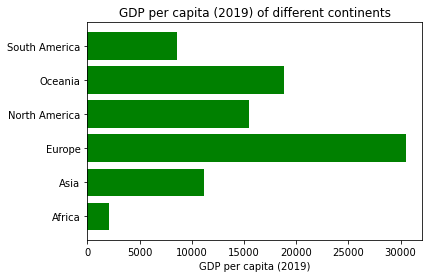

In [41]:
# Importation du dataframe
# df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world=pd.read_csv("World.csv")
df_world.rename(columns={'iso_a3': 'Country Code'}, inplace=True)
df_world=df_world[["continent", "Country Code"]]

dfpib_continent=df_world.merge(df_pib_name, on='Country Code', how='right')
dfpib_continent=dfpib_continent.groupby('continent').mean()
dfpib_continent=dfpib_continent.reset_index()
plt.barh(dfpib_continent["continent"], dfpib_continent['GDP per capita 2019'], color="green")
plt.title('GDP per capita (2019) of different continents')
plt.xlabel('GDP per capita (2019)')

On remarque que les continents ont des PIB par tête très différents. Si en moyenne le PIB par tête européen atteint les 30000 dollars, ce dernier atteint environ 2000 dollars en Afrique. 

## Données relatives à la condition des femmes 

Au sein des bases de données de la Banque Mondiale et de l'OCDE, nous avons effectué un gros travail afin de trouver les indicateurs complets et pertinents dans notre cadre d'étude, à savoir celui de l'impact de la condition des femmes sur le niveau de développement économique des pays. Par exemple, nous avons été amenées dans un premier temps à créer des sous-dataframes du dataframe de la Banque Mondiale regroupant les indicateurs contenant les termes "gender", "female" ou encore "women", puis à les examiner pour un seul pays à l'image de la France afin d'en avoir une meilleure visibilité (dans la mesure où l'indicateur existe pour chaque pays). 

In [42]:
df_bm2.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
df_women=df_bm2[df_bm2.Indicator.str.contains('women', case=False)]
df_gender=df_bm2[df_bm2.Indicator.str.contains('gender', case=False)]
df_female=df_bm2[df_bm2.Indicator.str.contains('female', case=False)]

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Par exemple:

In [43]:
FR=df_women[df_women['Country Name']=="France"]
FR.head()

,Country Code,Country Name,Indicator,Indicator Code,2019
168879,FRA,France,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,4.7454
168918,FRA,France,Antiretroviral therapy coverage for PMTCT (% o...,SH.HIV.PMTC.ZS,NaN
169060,FRA,France,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN
169061,FRA,France,"Contraceptive prevalence, modern methods (% of...",SP.DYN.CONM.ZS,NaN
169128,FRA,France,Demand for family planning satisfied by modern...,SH.FPL.SATM.ZS,NaN


Puis nous avons étudié manuellement les indicateurs de ce dataframe et leurs corrélations avec par exemple le PIB par habitants en 2019. Voici quelques exemples de variables qui nous ont semblées pertinentes plutôt que d'autres.

In [44]:
def corr_indicateurs(df1, df2, indicator_name) :
    
    X = df1[df1['Indicator']== indicator_name] # on sélectionne l'indicateur qui nous intéresse
        
    #On supprime la colonne 'Indicator code'
    X = X.drop(['Indicator Code'], axis = 1)
    
    #On supprime la colonne country name de la base PIB
    Y = df2.drop(['Country Name'], axis = 1)
    
    #On fusionne les 2 bases de données
    Z = X.merge(Y, how='inner', on= 'Country Code')
    
    #On supprime les lignes où certaines données sont manquantes
    index_with_nan = Z.index[Z.isnull().any(axis=1)]
    Z.drop(index_with_nan,0, inplace=True)
    print("Le nombre d'obervations est : ", Z.shape[0]) #On affiche le nombre d'observations restantes
    
    #On réalise les graphiques de corrélation
    X_ = Z.iloc[:,3].values
    y_ = Z.iloc[:,4].values
    
    graph = plt.scatter(X_, y_, color="green")
    
    return graph

Le nombre d'obervations est :  127


Text(0, 0.5, 'GDP per capita (2019) ($)')

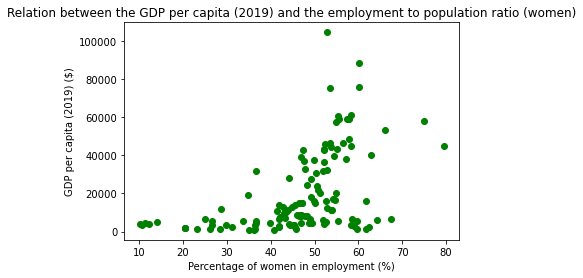

In [45]:
#Graphique de corrélation pour l'indicateur 'Employment to population ratio, 15+, female (%) (national estimate)'

corr_indicateurs(df_female, df_pib_name, 'Employment to population ratio, 15+, female (%) (national estimate)')
plt.title('Relation between the GDP per capita (2019) and the employment to population ratio (women)')
plt.xlabel('Percentage of women in employment (%)')
plt.ylabel('GDP per capita (2019) ($)')

Le nombre d'obervations est :  231


Text(0, 0.5, 'GDP per capita (2019) ($)')

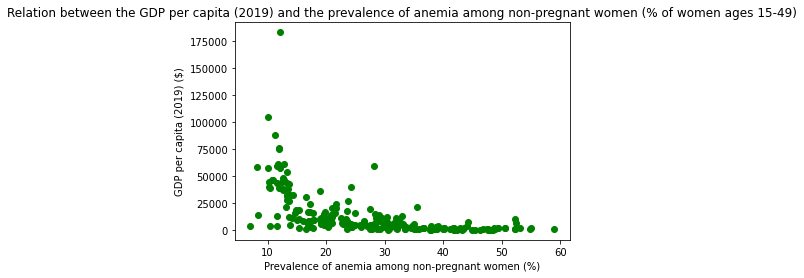

In [46]:
#Graphique de corrélation pour l'indicateur 'Prevalence of anemia among non-pregnant women (% of women ages 15-49)'

corr_indicateurs(df_women, df_pib_name, 'Prevalence of anemia among non-pregnant women (% of women ages 15-49)')
plt.title('Relation between the GDP per capita (2019) and the prevalence of anemia among non-pregnant women (% of women ages 15-49)')
plt.xlabel('Prevalence of anemia among non-pregnant women (%)')
plt.ylabel('GDP per capita (2019) ($)')

Le nombre d'obervations est :  225


Text(0, 0.5, 'GDP per capita (2019) ($)')

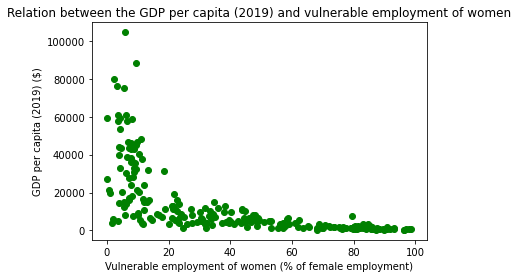

In [47]:
#Graphique de corrélation pour l'indicateur 'Vulnerable employment, female (% of male employment) (modeled ILO estimate)'

corr_indicateurs(df_female, df_pib_name, 'Vulnerable employment, female (% of female employment) (modeled ILO estimate)')
plt.title('Relation between the GDP per capita (2019) and vulnerable employment of women')
plt.xlabel('Vulnerable employment of women (% of female employment)')
plt.ylabel('GDP per capita (2019) ($)')

Le nombre d'obervations est :  40


Text(0, 0.5, 'GDP per capita (2019)($)')

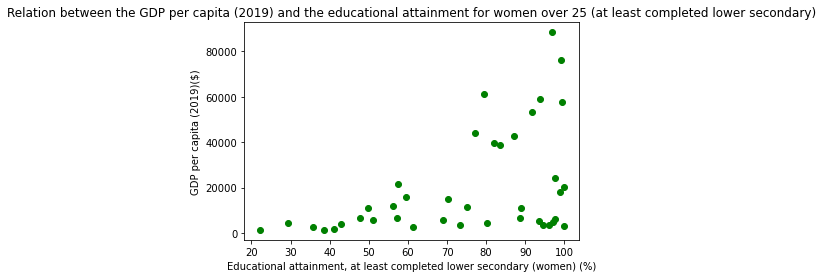

In [48]:
#Exemple d'indicateur non pertinent : Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)

corr_indicateurs(df_female, df_pib_name, 'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)')
plt.title('Relation between the GDP per capita (2019) and the educational attainment for women over 25 (at least completed lower secondary)')
plt.xlabel('Educational attainment, at least completed lower secondary (women) (%)')
plt.ylabel('GDP per capita (2019)($)')

Nous avons choisi de ne pas intégrer les variables peu renseignées à notre projet. 
Nous avons choisi de retenir au total 17 variables explicatives dans notre base de donnée du projet : 
- Fertility
- Life expectancy of women at birth
- Prevalence of anemia among non pregnant women
- Women share of population living with HIV 
- Domestic time ratio women on men
- Women s share amoung bank account owners 
- Adolescents out of school, female
- Children out of school, female
- Primary completion rate, female
- No contraception used without wanting having children
- Physical and sexual violences on women
- Abortion
- Women on vulnerable job
- Employment to population ratio, 15+, female
- Quota in parliament
- Specialized body (regarding gender equality) in parliament
- Women proportion (upper house)

Cette liste n'est bien entendu pas exhaustive et représente ce que nous sommes parvenues à obtenir de plus pertinent et de plus complet concernant la situatation des femmes. Les inégalités que subissent les femmes sont multidimensionnelles et nous avons essayé de retenir autant que possible des variables représentatives de ces différentes dimensions des inégalités hommes/femmes. 

# 3. Création de la base de données

## 3.1. Création de la base de données  les variables explicatives principales

In [49]:
# On récupère toutes les données de nos variables explicatives :
df_esperance_de_vie=bm_select("SP.DYN.LE00.FE.IN", 'Life expectancy of women at birth' )
df_anemia=bm_select("SH.ANM.NPRG.ZS", 'Prevalence of anemia among non pregnant women' )
df_hiv=bm_select("SH.DYN.AIDS.FE.ZS", 'Women share of population living with HIV' )
df_domestique=ocde_select("DF_HR_PRACT",'Domestic time ratio women on men')
df_banque=ocde_select("RAPFR_SAFS_PRACT",'Women s share amoung bank account owners')
df_descolariation_ado_w=bm_select("SE.PRM.UNER.FE.ZS",'Adolescents s share out of school, female')
df_descolariation_child_w=bm_select("SE.SEC.UNER.LO.FE.ZS",'Children s share out of school, female')
df_primary_completion_rate_f=bm_select("SE.PRM.CMPT.FE.ZS",'Women who completed primary')
df_descolariation_ado_m=bm_select("SE.SEC.UNER.LO.MA.ZS",'Adolescents s share out of school, male')
df_descolariation_child_m=bm_select("SE.PRM.UNER.MA.ZS",'Children s share out of school, male')
df_primary_completion_rate_m=bm_select("SE.PRM.CMPT.MA.ZS",'Men who completed primary')
df_contraception = ocde_select("RPI_RA_PRACT", 'No contraception used without wanting having children')
df_violences = ocde_select("RPI_VAW_PRACT", 'Physical and sexual violences on women')
df_employment= bm_select("SL.EMP.TOTL.SP.FE.NE.ZS",'Employment to population ratio, 15+, female')
df_vulnerableF=bm_select("SL.EMP.VULN.FE.ZS",'Vulnerable job, female')
df_vulnerableM=bm_select("SL.EMP.VULN.MA.ZS",'Vulnerable job, male')

In [50]:
#Modificication du df sur l'avortement pour permettre la fusion
df_avortement=data_abortion2.merge(df_pib_name, on='Country Name', how='inner')
df_avortement=df_avortement[["Country Name","Country Code", "GDP per capita 2019", "abortion"]]

In [51]:
df_avortement = df_avortement[['Country Code', 'abortion']]

In [52]:
df = df_esperance_de_vie.merge(df_domestique, on='Country Code', how='left')
df = df.merge(df_hiv, on='Country Code', how='outer')
df = df.merge(df_anemia, on='Country Code', how='outer')
df = df.merge(df_banque, on='Country Code', how='outer')
df = df.merge(df_descolariation_ado_w, on='Country Code', how='outer')
df = df.merge(df_descolariation_child_w, on='Country Code', how='outer')
df = df.merge(df_primary_completion_rate_f, on='Country Code', how='outer')
df = df.merge(df_descolariation_ado_m, on='Country Code', how='outer')
df = df.merge(df_descolariation_child_m, on='Country Code', how='outer')
df = df.merge(df_primary_completion_rate_m, on='Country Code', how='outer')
df = df.merge(df_contraception, on='Country Code', how='outer')
df = df.merge(df_violences, on='Country Code', how='outer')
df = df.merge(df_employment, on='Country Code', how='outer')
df = df.merge(df_vulnerableF, on='Country Code', how='outer')
df = df.merge(df_vulnerableM, on='Country Code', how='outer')
df = df.merge(df_avortement, on='Country Code', how='left')
df = df.merge(df_rp, on='Country Code', how='outer')
df = df.merge(data_fertility2, on='Country Code', how='left')
df= df.drop_duplicates()

In [53]:
# On supprime les lignes sans code pays
supprimer=["None"]
df=df[~df['Country Code'].isin(supprimer)]

In [54]:
#On réinitialise l'index
df = df.reset_index(drop=True)


## 3.2. Création des variables calculées 

D'une part, nous souhaitons examiner spécifiquement ce qui fait la particularité de la situation des femmes, et cela nécessite pour un certain nombre de variables d'effectuer un ratio de l'indicateur relatif à la population des femmes sur celui relatif à la population des hommes. Nous souhaitons également faire en sorte que toutes nos variables varient dans le même sens à savoir que plus la variable est élevée, meilleure est la situation des femmes. Nous avons par conséquent effectué des manipulations sur certains des indicateurs pour répondre à ces besoins. 

In [55]:
df["Share of np women living without anemia"]=100-df["Prevalence of anemia among non pregnant women"]
df["Share of np women living without HIV"]=100-df["Women share of population living with HIV"]
df["Domestic time ratio women on men (quota)"]=100-df["Domestic time ratio women on men"]
df["Ratio women on men ado out school"]= df["Adolescents s share out of school, female"]/df["Adolescents s share out of school, male"]
df["Ratio women on men children out school"]= df["Children s share out of school, female"]/df["Children s share out of school, male"]
df["Ratio women on men completed primary"]= df["Women who completed primary"]/df["Men who completed primary"]
df["Contraception used without wanting having children"]=100-df["No contraception used without wanting having children"]
df["No physical and sexual violences on women"]=100-df["Physical and sexual violences on women"]
df["Ratio women on men vulnerable job"]= df["Vulnerable job, female"]/df["Vulnerable job, male"]
df["Ratio women on men vulnerable job Tx"]=100-df["Ratio women on men vulnerable job"]
df["Fertility inverse"]=10-df["Fertility"]

## 3.3. Finalisation de la base de données globale

In [56]:
# On ajoute les données du PIB
df = df.merge(df_pib_name, on='Country Code', how='left')
df

,Country Code,Life expectancy of women at birth,Domestic time ratio women on men,Women share of population living with HIV,Prevalence of anemia among non pregnant women,Women s share amoung bank account owners,"Adolescents s share out of school, female","Children s share out of school, female",Women who completed primary,"Adolescents s share out of school, male",...,Ratio women on men ado out school,Ratio women on men children out school,Ratio women on men completed primary,Contraception used without wanting having children,No physical and sexual violences on women,Ratio women on men vulnerable job,Ratio women on men vulnerable job Tx,Fertility inverse,Country Name,GDP per capita 2019
0,AFE,66.202116,NaN,60.062444,33.432299,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.203630,98.796370,NaN,Africa Eastern and Southern,1499.256275
1,AFW,59.231072,NaN,61.990050,50.511312,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.180198,98.819802,NaN,Africa Western and Central,1843.558468
2,ARB,73.832314,NaN,40.461413,33.212609,NaN,15.58040,18.380989,84.786118,14.44424,...,1.078658,1.467422,0.961422,NaN,NaN,1.260327,98.739673,NaN,Arab World,6206.570758
3,CSS,76.032605,NaN,49.739577,20.080555,NaN,NaN,11.200680,NaN,13.17920,...,NaN,NaN,NaN,NaN,NaN,0.749501,99.250499,NaN,Caribbean small states,10050.327615
4,CEB,80.833612,NaN,NaN,NaN,NaN,4.30292,5.755160,93.246231,4.96398,...,0.866829,1.258608,0.995808,NaN,NaN,0.734547,99.265453,NaN,Central Europe and the Baltics,14823.026908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,YEM,67.826000,NaN,37.300000,61.800000,12.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71.3,33.0,1.287139,98.712861,6.300,"Yemen, Rep.",NaN
264,ZMB,66.891000,NaN,61.500000,30.700000,40.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,78.9,57.3,1.256438,98.743562,5.441,Zambia,1348.743220
265,ZWE,62.899000,1.93,60.200000,28.700000,42.4,13.93845,NaN,89.320374,NaN,...,NaN,NaN,1.018472,89.6,64.6,1.389035,98.610965,6.469,Zimbabwe,1367.676915
266,TWN,NaN,NaN,NaN,NaN,50.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Création des indicateurs dimensionnels des inégalités hommes/femmes

Le GII, et d'une façon plus générale la littérature s'intéressant aux inégalités hommes/femmes identifie la plupart du temps 8 dimensions d'inégalités de genre liées à : 

- L'accès à la santé 
- La position au sein du ménage 
- L'intégrité physique 
- L'éducation 
- Les ressources économiques 
- La capacité d'action politique
- L'activité économique
- L'identité de genre (qui décrit des questions culturelles telles que la socialisation des filles et des garçons, la rigidité de la division sexuelle des rôles, etc. garçons, la rigidité de la division sexuelle des rôles)

Nous avons regroupé les variables que nous avons selectionnées dans les 7 premières dimensions identifiées. Nous avons fait le choix de laisser de côté la dernière dimension, qui reste très qualitative et qui par conséquent est difficile à étudier dans un tel projet. 

Pour ce qui est de la pondération respective des variables à l'intérieur des indicateurs, nous avons fait le choix de donner une importance relative plus faible aux variables binaires pour ne pas biaiser les résultats. Nous avons ensuite déterminé certaine pondérations en comparant l'importance relative établie des différentes variables.

## Fonction de normalisation  

In [57]:
def normalize_columns(df: pd.DataFrame, columns: list)-> pd.DataFrame:   
    for col in columns:
        try:

            df.loc[:,col] = (df.loc[:,col]- df.loc[:,col].min())/(df.loc[:,col].max()- df.loc[:,col].min())
        except:
            print(col + " n'a pas été normalisé \n")
    return df
            

## Indicateur accès à la santé

Nous avons retenu pour cet indicateur les variables : 
- Life expectancy of women at birth
- Share of non pregnant (np) women living without anemia
- Share of np women living without HIV

In [58]:
df["Share of np women living without anemia indicator"]=df["Share of np women living without anemia"]/df["Share of np women living without anemia"].max()
df["Share of np women living without HIV indicator"]=df["Share of np women living without HIV"]/df["Share of np women living without HIV"].max()
df["Life expectancy of women at birth indicator"]=df["Life expectancy of women at birth"]/df["Life expectancy of women at birth"].max()

In [59]:
df["Indicateur santé"]=df["Indicateur sante"]= 3/4 *df["Life expectancy of women at birth indicator"]+ 2/12*df["Share of np women living without anemia indicator"] + 1/12*df["Share of np women living without HIV indicator"]

In [60]:
df = normalize_columns(df,["Indicateur santé"])
df["Indicateur santé"]

0      0.337647
1      0.096145
2      0.555698
3      0.645334
4           NaN
         ...   
263    0.293408
264    0.362633
265    0.285584
266         NaN
267         NaN
Name: Indicateur santé, Length: 268, dtype: float64

## Indicateur autonomie au sein du ménage

Nous avons retenu pour cet indicateur les variables : 
- Domestic time ratio women on men (quota)
- Fertility inverse


In [61]:
df["Domestic time ratio women on men indicator"]=df["Domestic time ratio women on men (quota)"]/df["Domestic time ratio women on men (quota)"].max()
df["Fertility indicator"]=df["Fertility inverse"]/df["Fertility inverse"].max()

In [62]:
df["Indicateur ménage"]=1/2*df["Domestic time ratio women on men indicator"]+1/2*df["Fertility indicator"]


In [63]:
df = normalize_columns(df,["Indicateur ménage"])
df["Indicateur ménage"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
263         NaN
264         NaN
265    0.563071
266         NaN
267         NaN
Name: Indicateur ménage, Length: 268, dtype: float64

## Indicateur intégrité physique  

Nous avons retenu pour cet indicateur les variables : 
- Abortion
- Contraception used without wanting having children
- No physical and sexual violences on women

In [64]:
df["Contraception used without wanting having children indicator"]=df["Contraception used without wanting having children"]/df["Contraception used without wanting having children"].max()
df["No physical and sexual violences on women indicator"]=df["No physical and sexual violences on women"]/df["No physical and sexual violences on women"].max()

In [65]:
df["Indicateur intégrité physique"]=1/5*df["abortion"]+2/5*df["Contraception used without wanting having children"]+2/5*df["No physical and sexual violences on women"]

In [66]:
df = normalize_columns(df,["Indicateur intégrité physique"])
df["Indicateur intégrité physique"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
263         NaN
264    0.441532
265    0.622984
266         NaN
267         NaN
Name: Indicateur intégrité physique, Length: 268, dtype: float64

## Indicateur éducation 

Nous avons retenu pour cet indicateur les variables : 
- Ratio women on men ado out school
- Ratio women on men children out school
- Ratio women on men completed primary

In [67]:
df["Ratio women on men ado out school indicator"]=df["Ratio women on men ado out school"]/df["Ratio women on men ado out school"].max()
df["Ratio women on men children out school indicator"]=df["Ratio women on men children out school"]/df["Ratio women on men children out school"].max()
df["Ratio women on men completed primary indicator"]=df["Ratio women on men completed primary"]/df["Ratio women on men completed primary"].max()

In [68]:
df["Indicateur éducation"]=1/3*df["abortion"]+1/3*df["Contraception used without wanting having children"]+1/3*df["No physical and sexual violences on women"]

In [69]:
df = normalize_columns(df,["Indicateur éducation"])
df["Indicateur éducation"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
263         NaN
264    0.439318
265    0.619860
266         NaN
267         NaN
Name: Indicateur éducation, Length: 268, dtype: float64

## Indicateur ressources économiques 

Nous avons retenu pour cet indicateur les variables : 
- Women s share amoung bank account owners

In [70]:
df["Indicateur ressources économiques"]=df["Women s share amoung bank account owners"]/df["Women s share amoung bank account owners"].max()

In [71]:
df = normalize_columns(df,["Indicateur ressources économiques"])
df["Indicateur ressources économiques"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
263    0.000000
264    0.641026
265    0.694639
266    0.876457
267    0.643357
Name: Indicateur ressources économiques, Length: 268, dtype: float64

## Indicateur action politique  

Nous avons retenu pour cet indicateur les variables : 
- Quota 	
- Specialized body
- Women proportion (upper house)

In [72]:
df["Women proportion (upper house)"] = df["Women proportion (upper house)"].astype(float, errors = 'raise')
df["Women proportion (upper house) indicator"]=df["Women proportion (upper house)"]/df["Women proportion (upper house)"].max()

In [73]:
df["Indicateur action politique"]=1/2*df["Women proportion (upper house) indicator"]+1/4*df["Specialized body"]+1/3*df["Quota"]

In [74]:
df = normalize_columns(df,["Indicateur action politique"])
df["Indicateur action politique"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
263         NaN
264         NaN
265    0.578564
266         NaN
267         NaN
Name: Indicateur action politique, Length: 268, dtype: float64

## Indicateur activité économique  

Nous avons retenu pour cet indicateur les variables : 
- Ratio women on men vulnerable job Tx
- Employment to population ratio, 15+, female

In [75]:
df["Ratio women on men vulnerable job Tx indicator"]=df["Ratio women on men vulnerable job Tx"]/df["Ratio women on men vulnerable job Tx"].max()
df["Employment to population ratio, 15+, female indicator"]=df["Employment to population ratio, 15+, female"]/df["Employment to population ratio, 15+, female"].max()

In [76]:
df["Indicateur activité économique"]=1/2*df["Employment to population ratio, 15+, female indicator"]+1/2*df["Ratio women on men vulnerable job Tx indicator"]

In [77]:
df = normalize_columns(df,["Indicateur activité économique"])
df["Indicateur activité économique"]

0           NaN
1           NaN
2           NaN
3           NaN
4      0.568054
         ...   
263         NaN
264    0.190026
265    0.269699
266         NaN
267         NaN
Name: Indicateur activité économique, Length: 268, dtype: float64

# 5. Création de l'indicateur global 

Les scientifiques qui ont construit l'indicateur GII on effectué une MCA (Multiple Correspondence Analysis, méthode qui permet d'évaluer l'importance relative de certaines variables les unes par rapport aux autres dans un dataset) sur les variables explicatives des inégalités hommes/femmes qui leur a permis d'établir des pondérations de chaque sous-indicateur. En utilisant les résultats de cette MCA nous avons pu estimer les pondérations relatives de nos sous-indicateurs: 
- Accès à la santé : 0.179
- Position au sein du ménage : 0.203
- L'intégrité physique : 0.140
- L'education : 0,131
- Les ressources économiques : 0.169
- La capacité d'action politique : 0,085
- L'activité économique : 0.093

Avant calculer l'indicateur global, nous avons choisi d'imputer les valeurs manquantes pour chaque pays par la moyenne des indicateurs obtenus pour un pays. Cette méthode n'est pas parfaite, mais elle permet d'obtenir un indicateur global pour le maximum de pays, même si une valeur pour un ou plusieurs des indicateurs n'existe pas. 

In [78]:
df_indicateurs=df[["Country Code", "Indicateur santé", "Indicateur ménage", "Indicateur intégrité physique", "Indicateur éducation", "Indicateur ressources économiques", "Indicateur action politique","Indicateur activité économique"]]
df_indicateurs = df_indicateurs.set_index("Country Code")
#On calcule la moyenne pour chaque pays, on remplace les nan par la valeur moyenne de la colonne
df_indicateurs = df_indicateurs.T
df_indicateurs = df_indicateurs.fillna(value = df_indicateurs.mean())
#On transpose le data frame pour retrouver sa structure initiale
df_indicateurs = df_indicateurs.T

Nous avons ensuite utilisé les pondérations estimées de nos sous-indicateurs pour créer l'estimateur global. 

In [79]:
df_indicateurs["Indicateur global"]=(0.179)*df_indicateurs["Indicateur santé"]+(0.203)*df_indicateurs["Indicateur ménage"]+(0.140)*df_indicateurs["Indicateur intégrité physique"]+(0.131)*df_indicateurs["Indicateur éducation"]+(0.169)*df_indicateurs["Indicateur ressources économiques"]+(0.085)*df_indicateurs["Indicateur action politique"]+(0.093)*df_indicateurs["Indicateur activité économique"]
df_indicateurs["Indicateur global"]

Country Code
AFE    0.337647
AFW    0.096145
ARB    0.555698
CSS    0.645334
CEB    0.568054
         ...   
YEM    0.148171
ZMB    0.429776
ZWE    0.525496
TWN    0.876457
XKO    0.643357
Name: Indicateur global, Length: 268, dtype: float64

# 6. Statistiques globales sur l'indicateur et évaluation

## Evaluation économétrique 

On cherche à évaluer le lien entre l'indicateur global construit et le PIB par tête en 2019. Pour cela, nous faisons une régression linéaire simple du PIB par tête sur l'indicateur global.

In [80]:
df_indicateurs=df_indicateurs.merge(df_pib, on ="Country Code", how="left")
df_indicateurs.dropna(inplace=True)

In [81]:
# Régression linéaire 
X = df_indicateurs[["Indicateur global"]]
X = sm.add_constant(X)
y = df_indicateurs["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.306
Model:                             OLS   Adj. R-squared:                  0.303
Method:                  Least Squares   F-statistic:                     92.76
Date:                 Thu, 06 Jan 2022   Prob (F-statistic):           2.04e-18
Time:                         18:03:36   Log-Likelihood:                -2341.6
No. Observations:                  212   AIC:                             4687.
Df Residuals:                      210   BIC:                             4694.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.576e+04

Il existe une relation linéaire entre le PIB par tête et l'indicateur global, synthétisant la condition des femmes selon cette régression. En effet, toutes choses égales par ailleurs, si l'indicateur augmente de 0.1 points, on prédit une augmentation d'environ 4902 dollars du PIB par tête. Le coefficient est statistiquement significatif. 

Le $R²$ est quant à lui relativement faible (0.3). Cela peut être expliqué par l'existence d'autres déterminants du PIB qui peuvent être différents de la condition des femmes.

## Statistiques sur l'indicateur 

L'indicateur global créé est dispersé entre 0 et 1. La moyenne de l'indicateur est de 0.59. 

In [82]:
df_indicateurs["Indicateur global"].describe()

count    212.000000
mean       0.594681
std        0.205970
min        0.020840
25%        0.447136
50%        0.617734
75%        0.767133
max        0.960993
Name: Indicateur global, dtype: float64

On cherche ensuite à étudier la répartition de l'indicateur en fonction des différents continents. Pour cela, on se sert de "world.csv" qui associe chaque pays à un continent. On effectue une jointure entre la table world et la table des indicateurs, de manière à associer à chaque pays un continent et un indicateur global. 

In [83]:
df_indicateurs2=df_indicateurs[[ "Indicateur global"]]
df_indicateurs2=df_indicateurs.merge(df_world, on='Country Code', how='left')
df_indicateurs2=df_indicateurs2[["Country Code", "Indicateur global", "continent"]]

On crée une colonne par continent pour pouvoir faire des boxplots par continent.

In [84]:
Africa=["Africa"]
df_indicateurs_af=df_indicateurs2[df_indicateurs2['continent'].isin(Africa)]
df_indicateurs_af.rename(columns={'Indicateur global': 'Africa'}, inplace=True)
Asia=["Asia"]
df_indicateurs_as=df_indicateurs2[df_indicateurs2['continent'].isin(Asia)]
df_indicateurs_as.rename(columns={'Indicateur global': 'Asia'}, inplace=True)
Eur=["Europe"]
df_indicateurs_eur=df_indicateurs2[df_indicateurs2['continent'].isin(Eur)]
df_indicateurs_eur.rename(columns={'Indicateur global': 'Europe'}, inplace=True)
NA=["North America"]
df_indicateurs_na=df_indicateurs2[df_indicateurs2['continent'].isin(NA)]
df_indicateurs_na.rename(columns={'Indicateur global': 'North America'}, inplace=True)
OC=["Oceania"]
df_indicateurs_oc=df_indicateurs2[df_indicateurs2['continent'].isin(OC)]
df_indicateurs_oc.rename(columns={'Indicateur global': 'Oceania'}, inplace=True)
SA=["South America"]
df_indicateurs_sa=df_indicateurs2[df_indicateurs2['continent'].isin(SA)]
df_indicateurs_sa.rename(columns={'Indicateur global': 'South America'}, inplace=True)

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [85]:
df_indicateurs2=df_indicateurs2[["Country Code"]]
df_indicateurs2=df_indicateurs2.merge(df_indicateurs_af, on='Country Code', how='left')
df_indicateurs2=df_indicateurs2.merge(df_indicateurs_as, on='Country Code', how='left')
df_indicateurs2=df_indicateurs2.merge(df_indicateurs_eur, on='Country Code', how='left')
df_indicateurs2=df_indicateurs2.merge(df_indicateurs_na, on='Country Code', how='left')
df_indicateurs2=df_indicateurs2.merge(df_indicateurs_oc, on='Country Code', how='left')
df_indicateurs2=df_indicateurs2.merge(df_indicateurs_sa, on='Country Code', how='left')
df_indicateurs2=df_indicateurs2[["Country Code","Africa", "Asia", "Europe", "North America", "Oceania", "South America" ]]

Text(0.5, 1.0, 'Distribution of the global indicator for different continents ')

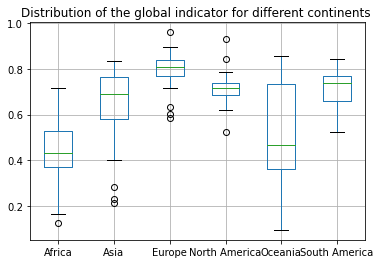

In [87]:
df_indicateurs2.boxplot()
plt.title("Distribution of the global indicator for different continents ")

On obtient ici la dispersion de l'indicateur en fonction des différents continents. Ainsi, l'indicateur global semble assez élevé en Europe (centré aux alentours de 0.8) et plus faible en Afrique par exemple (l'indicateur y est centré aux alentours de 0.4). 

# 7. Visualisation de l'indicateur 

- carte

# Conclusion

Nous avons construit un indicateur multimensionnel sur la condition des femmes, en nous appuyant sur plusieurs domaines mis en avant par la littérature économique: la santé, la condition des femmes au sein du ménage, l'intégrité physique, l'éducation, les ressources économiques, l'action politique et l'activité économique. 

L'analyse économétrique met en évidence une relation linéaire entre la condition des femmes dans un pays et le PIB par tête de ce pays. Plus la condition des femmes dans un pays est élevée, plus le pays est développé (en termes économiques). 

Notre analyse pourrait être élargie en incorporant en plus d'une réflexion sur la dimension économique du développement des pays, une réflexion sur une dimension plus humaine, au travers d'autres indicateurs comme l'IDH (Indice de développement humain). 